In [3]:
!pip install kagglehub


   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   ---------------------------------------- 2/2 [kagglehub]



In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amulyas/penguin-size-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\KIIT0001\.cache\kagglehub\datasets\amulyas\penguin-size-dataset\versions\1


In [23]:
import pandas as pd
import os
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Download dataset**

In [7]:
path = kagglehub.dataset_download("amulyas/penguin-size-dataset")
print("Dataset folder:", path)

Dataset folder: C:\Users\KIIT0001\.cache\kagglehub\datasets\amulyas\penguin-size-dataset\versions\1


**List all files inside that folder**

In [8]:
files = os.listdir(path)
print("Files:", files)

Files: ['penguins_size.csv']


In [9]:
csv_path = os.path.join(path, "penguins_size.csv")
df = pd.read_csv(csv_path)

In [10]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [11]:
print("Shape:", df.shape)
print("\nColumns:", df.columns)

print("\nMissing values:\n", df.isnull().sum())
df.info()

Shape: (344, 7)

Columns: Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Missing values:
 species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [12]:
df.isna

<bound method DataFrame.isna of     species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     bo

In [15]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [16]:
# Fill missing numeric values with median
num_cols = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical with mode
df["sex"] = df["sex"].fillna(df["sex"].mode()[0])

print("Missing values after filling:\n", df.isnull().sum())

Missing values after filling:
 species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [17]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [18]:
X = df.drop("species", axis=1)
y = df["species"]

**One-hot encoding for categorical columns**

In [20]:
X = pd.get_dummies(X, drop_first=True)
print("Final X shape:", X.shape)
X.head()

Final X shape: (344, 8)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.10,18.7,181.0,3750.0,False,True,False,True
1,39.50,17.4,186.0,3800.0,False,True,True,False
2,40.30,18.0,195.0,3250.0,False,True,True,False
3,44.45,17.3,197.0,4050.0,False,True,False,True
4,36.70,19.3,193.0,3450.0,False,True,True,False


**Train-Test Split**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape)
print("Test:", X_test.shape)

Train: (275, 8)
Test: (69, 8)


In [24]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(" Baseline Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Baseline Accuracy: 0.9855072463768116

 Confusion Matrix:
 [[29  1  0]
 [ 0 14  0]
 [ 0  0 25]]

 Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        30
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



In [25]:
tree_values = [10, 50, 100, 200, 300]
acc_list = []

for n in tree_values:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    acc = accuracy_score(y_test, pred)
    acc_list.append(acc)

    print(f"Trees = {n} -> Accuracy = {acc:.4f}")

best_n = tree_values[acc_list.index(max(acc_list))]
print("\n Best n_estimators:", best_n)


Trees = 10 -> Accuracy = 0.9710
Trees = 50 -> Accuracy = 0.9855
Trees = 100 -> Accuracy = 0.9855
Trees = 200 -> Accuracy = 1.0000
Trees = 300 -> Accuracy = 1.0000

 Best n_estimators: 200


In [27]:
print("Total trees in forest:", len(rf.estimators_))

Total trees in forest: 100


In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

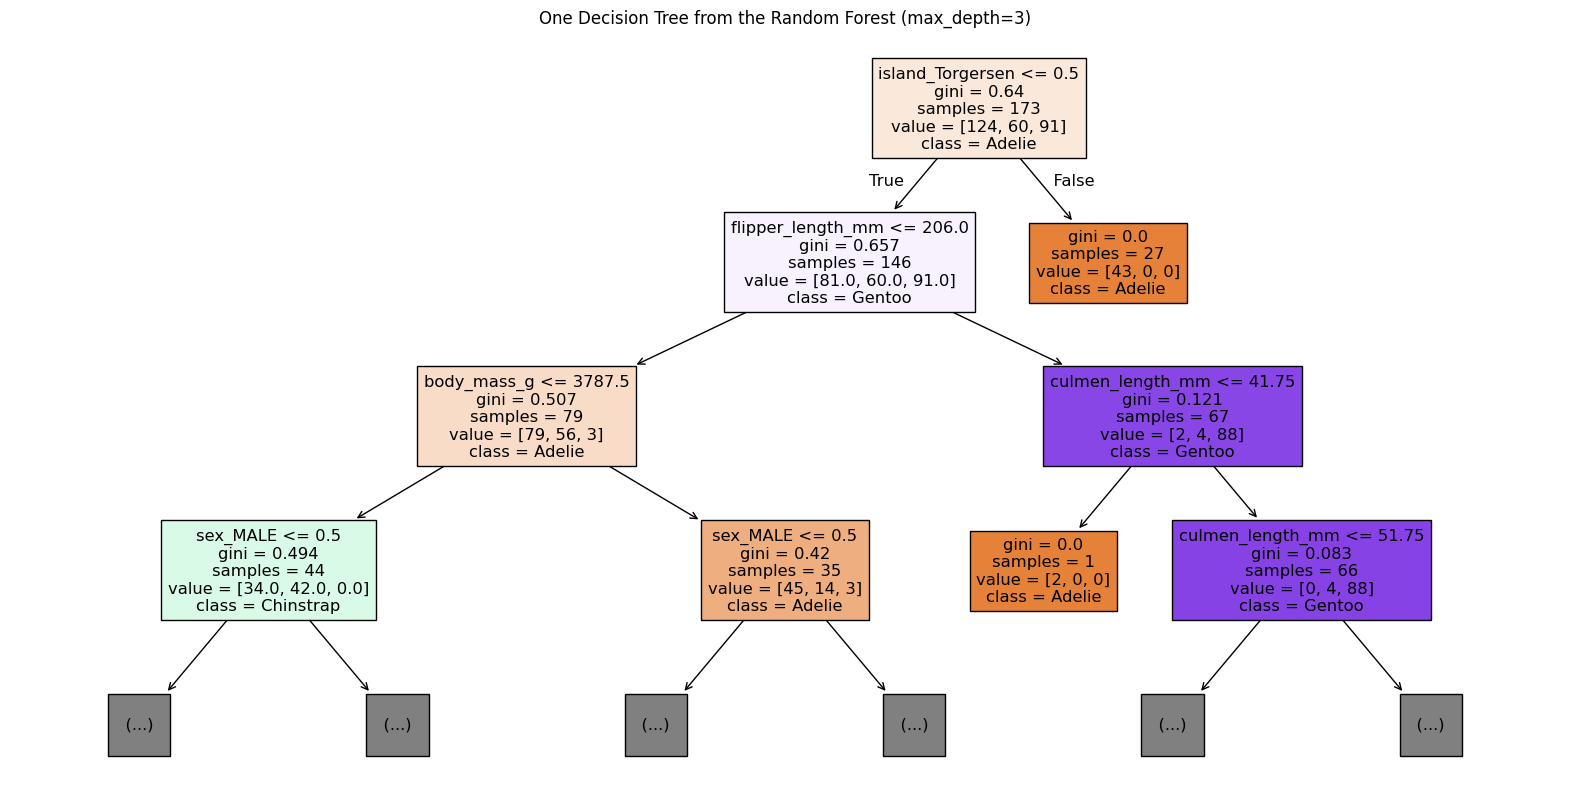

In [29]:
plt.figure(figsize=(20,10))
plot_tree(
    rf.estimators_[0], 
    feature_names=X.columns, 
    class_names=rf.classes_, 
    filled=True, 
    max_depth=3
)
plt.title("One Decision Tree from the Random Forest (max_depth=3)")
plt.show()

In [30]:
imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n Feature Importances:\n", imp)


 Feature Importances:
 culmen_length_mm     0.329724
flipper_length_mm    0.260763
culmen_depth_mm      0.178690
island_Dream         0.105633
body_mass_g          0.085330
island_Torgersen     0.029795
sex_MALE             0.005154
sex_FEMALE           0.004912
dtype: float64


In [31]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(model, X, y, cv=5)

print("CV Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

CV Scores: [1.         0.97101449 0.98550725 1.         0.98529412]
Mean CV Accuracy: 0.9883631713554987


In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 10, None],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Params: {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 50}
Best CV Score: 0.989090909090909


In [35]:
best_model = grid.best_estimator_
best_pred = best_model.predict(X_test)

print("Best Model Test Accuracy:", accuracy_score(y_test, best_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, best_pred))
print("\nClassification Report:\n", classification_report(y_test, best_pred))


Best Model Test Accuracy: 0.9710144927536232

Confusion Matrix:
 [[28  1  1]
 [ 0 14  0]
 [ 0  0 25]]

Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        30
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       0.96      1.00      0.98        25

    accuracy                           0.97        69
   macro avg       0.96      0.98      0.97        69
weighted avg       0.97      0.97      0.97        69

